In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Nous allons analyser ces données pour répondre aux questions suivantes:

Quel est le meilleur mois de vente ? 
et Quel est le chiffre d'affaires de ce mois ?
Dans quelle ville a-t-on le plus vendu de produits ?
A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
Quels sont les produits qui sont souvent achetés ensemble ?
Quel produit a-t-on le plus vendu et pourquoi ?


Inspiré tutoriel https://www.youtube.com/watch?v=bSnDlvJWed8&list=PL049bGjkT7dLJo748aOvXnUg0YtR1tacv&index=28

In [ ]:
data = "/gdrive/MyDrive/data/datasets/SalesAnalysis/Sales_Data/"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
os.listdir("/gdrive/MyDrive/data/datasets/SalesAnalysis/Sales_Data/")

['Sales_November_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_September_2019.csv',
 'Sales_August_2019.csv',
 'Sales_July_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv']

**Importer les données**

In [ ]:
janvier_sales = pd.read_csv("/gdrive/MyDrive/data/datasets/SalesAnalysis/Sales_Data/Sales_January_2019.csv")

In [ ]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [ ]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
janvier_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## **Merger les données**

In [ ]:
files = [fichier for fichier in os.listdir("/gdrive/MyDrive/data/datasets/SalesAnalysis/Sales_Data/") if fichier.endswith('.csv')]
files

['Sales_November_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_September_2019.csv',
 'Sales_August_2019.csv',
 'Sales_July_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv']

In [ ]:
df = pd.DataFrame()

for file in files:
  data_interm = pd.read_csv(data + file)
  df = pd.concat([df, data_interm])


In [ ]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
5,278802,USB-C Charging Cable,1,11.95,11/14/19 20:34,"154 2nd St, San Francisco, CA 94016"
6,278803,Lightning Charging Cable,1,14.95,11/11/19 08:05,"724 5th St, San Francisco, CA 94016"
7,278804,Bose SoundSport Headphones,1,99.99,11/15/19 11:48,"866 Sunset St, Austin, TX 73301"
8,278805,Lightning Charging Cable,1,14.95,11/27/19 11:50,"670 Elm St, San Francisco, CA 94016"
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215"


In [ ]:
df.shape

(186850, 6)

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


**Verifier les valeurs manquantes sur la ligne**

In [ ]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Affichons un df avec toutes les lignes qui ont au moins une valeur manquante
L'instruction return true pour toutes les lignes manquantes.

In [ ]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
16133,NaN,NaN,NaN,NaN,NaN,NaN
16175,NaN,NaN,NaN,NaN,NaN,NaN
16191,NaN,NaN,NaN,NaN,NaN,NaN
16379,NaN,NaN,NaN,NaN,NaN,NaN


## **Nettoyage des valeurs abérrantes**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum(axis=0)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**Débarassons-nous des lignes avec des valeurs abérantes**

In [ ]:
df['Order Date'] == "Order Date"

0        False
1        False
2        False
3        False
4        False
         ...  
16630    False
16631    False
16632    False
16633    False
16634    False
Name: Order Date, Length: 186305, dtype: bool

In [ ]:
df[df['Order Date'] == "Order Date"] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
14291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15963,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16234,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Afficher toutes les lignes ou on a pas une valeurs correctes

In [ ]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
14291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15963,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16234,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Recuperation des indexes

In [ ]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

Verifier s'il y a encore de ligne sans digit en utilisant ~ 

In [ ]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des types de données

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [ ]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [ ]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,2019-05-08 19:15:00,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,2019-05-24 22:02:00,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,2019-05-24 17:44:00,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,2019-05-04 12:46:00,"204 Adams St, Seattle, WA 98101"


## **Analyse Exploratoire proprement dite**

**Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois**

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215"


On va mettre la date commme index.

In [ ]:
df_clean.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16625, 16626, 16627, 16628, 16629, 16630, 16631, 16632, 16633,
            16634],
           dtype='int64', length=182735)

In [ ]:
df_clean  = df_clean.set_index('Order Date')

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-11-21 09:54:00,278797,Wired Headphones,1,11.99,"46 Park St, New York City, NY 10001"
2019-11-17 10:03:00,278798,USB-C Charging Cable,2,11.95,"962 Hickory St, Austin, TX 73301"
2019-11-19 14:56:00,278799,Apple Airpods Headphones,1,150.00,"464 Cherry St, Los Angeles, CA 90001"
2019-11-25 22:24:00,278800,27in FHD Monitor,1,149.99,"649 10th St, Seattle, WA 98101"
2019-11-09 13:56:00,278801,Bose SoundSport Headphones,1,99.99,"522 Hill St, Boston, MA 02215"


In [ ]:
df_clean.sort_index(inplace=True)

On crée une colonne month

In [ ]:
df_clean['Month'] = df_clean.index.month_name()

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [ ]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90


On va déterminer le chiffre d'affaire par mois et on fait la somme puis par ordre croissant

In [ ]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: chiffre_daffaire, dtype: float64

Le mois de décembre on a le meilleur chiffre d'affaire

In [ ]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [ ]:
df_clean.groupby('Month')["chiffre_daffaire"].sum()

Month
April        3336376.42
August       2191698.31
December     4557905.42
February     2158127.48
January      1786511.29
July         2587444.91
June         2524464.99
March        2755969.40
May          3101881.04
November     3149785.09
October      3679254.16
September    2050361.26
Name: chiffre_daffaire, dtype: float64

In [ ]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

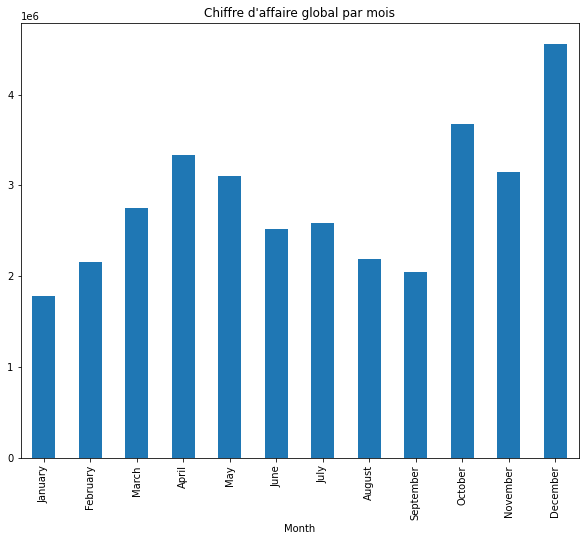

In [ ]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Chiffre d'affaire global par mois")

**Conclusion: On remarque que les ventes augmentes au début du mois et décroit au mois de Mai puis reprend sa croissance dans les trois derniers mois. Au début du mois on peut supposer que c'est la période des fêtes. Il y a eu une baisse en période d'été peut être parce que beaucoup ont voyagés**

In [ ]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4557905.42

**Dans quelle ville a-t-on le plus vendu de produits**

In [ ]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90
...,...,...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035",January,2.99
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001",January,11.95
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016",January,99.99


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182735 entries, 2019-01-01 03:07:00 to 2020-01-01 05:13:00
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int64  
 3   Price Each        182735 non-null  float64
 4   Purchase Address  182735 non-null  object 
 5   Month             182735 non-null  object 
 6   chiffre_daffaire  182735 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.2+ MB


In [ ]:
df_clean.describe()

,Quantity Ordered,Price Each,chiffre_daffaire
count,182735.000000,182735.000000,182735.000000
mean,1.124333,184.315392,185.403890
std,0.442937,332.684344,332.877445
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [ ]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [ ]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [ ]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [ ]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-08-10 19:22:00,239960,AAA Batteries (4-pack),2,2.99,"349 Walnut St, Boston, MA 02215",August,5.98,Boston
2019-02-21 22:23:00,159794,34in Ultrawide Monitor,1,379.99,"212 Chestnut St, Los Angeles, CA 90001",February,379.99,Los Angeles
2019-09-17 11:09:00,258507,Lightning Charging Cable,1,14.95,"386 14th St, Boston, MA 02215",September,14.95,Boston
2019-03-24 13:02:00,165145,20in Monitor,1,109.99,"992 Cedar St, San Francisco, CA 94016",March,109.99,San Francisco
2019-01-13 23:38:00,150339,AA Batteries (4-pack),2,3.84,"508 Jackson St, New York City, NY 10001",January,7.68,New York City


In [ ]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: chiffre_daffaire, dtype: float64

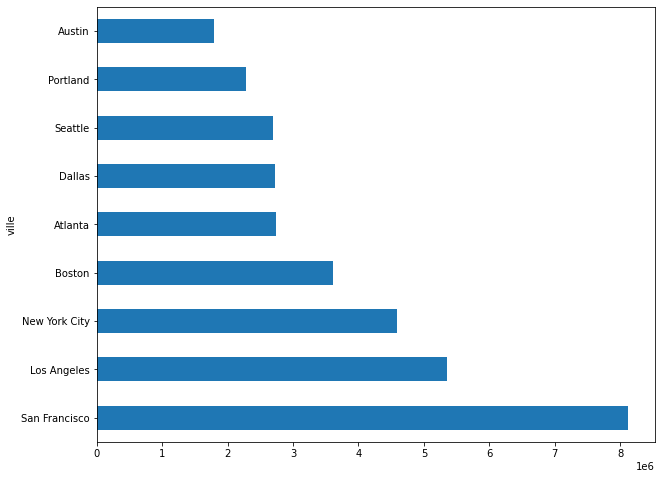

In [ ]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

La ville où on a réalisé un meilleur chiffre d'affaire est San franscisco. Peut être qu'on a plus de boutique ou plus d'habitant

A quelle heure devrons nous passer de la publicité pour augmenter nos ventes?

In [ ]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta
...,...,...,...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035",January,2.99,Portland
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001",January,11.95,New York City
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco


In [ ]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [ ]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [ ]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [ ]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [ ]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


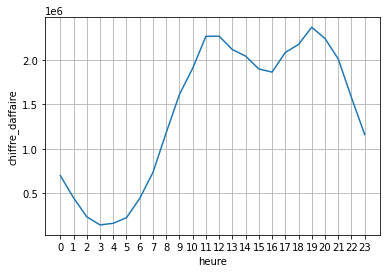

In [ ]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.grid()
plt.show()

**On remarque que entre 11 et 12 puis 19h on a le plus de vente. on pourrait afficher la publicité à 10h et à 16h parce qu'ils y a plus d'affluence**

**Quels sont les produits qui sont souvent achetés ensemble**

In [ ]:
Les produits vendus ensemble on le même order ID

SyntaxError: ignored

Les ventes avec plus d'un produit : Pour eviter qu'il supprime les doublons on met keep=false.

In [ ]:
df_clean['Order ID'].duplicated(keep=False)

Order Date
2019-01-01 03:07:00    False
2019-01-01 03:40:00    False
2019-01-01 04:56:00    False
2019-01-01 05:53:00    False
2019-01-01 06:03:00    False
                       ...  
2020-01-01 04:13:00    False
2020-01-01 04:21:00    False
2020-01-01 04:54:00    False
2020-01-01 05:13:00     True
2020-01-01 05:13:00     True
Name: Order ID, Length: 182735, dtype: bool

In [ ]:
df_clean[df_clean['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [ ]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [ ]:
df_m = df_clean[df_clean['Order ID'].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [ ]:
df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     AA Batteries (4-pack);Apple Airpods Headphones
141365                   Wired Headphones;Vareebadd Phone
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            Wired Headphones;iPhone
319596                    Lightning Charging Cable;iPhone
319631    34in Ultrawide Monitor;Lightning Charging Cable
Name: Product, Length: 6928, dtype: object

In [ ]:
ensemble=df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

In [ ]:
for i, j in combinations(['a', 'c', 'b'], 2):
    print(i, j)

a c
a b
c b


In [ ]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'AA Batteries (4-pack);Apple Airpods Headphones',
 'Wired Headphones;Vareebadd Phone',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Wired Headphones;Apple Airpods Headphones',
 'Apple Airpods Headphones;USB-C Charging Cable',
 'Lightning Charging Cable;Wired Headphones',
 'Lightning Charging Cable;iPhone',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'Google Phone;USB-C Charging Cable',
 'Wired Headphones;iPhone',
 'Google Phone;USB-C Charging Cable',
 'AAA Batteries (4-pack);AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Wired Headphones;Vareebadd Phone',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Bose SoundSport Headphones;Lightning Charging Cable',
 'Wired Headphones;Google Phone',
 'iPhon

In [ ]:
for achat in ensemble.to_list():
    products = achat.split(';')
    print(products)
    count.update(Counter(combinations(products, 2)))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
['Wired Headphones', 'iPhone']
['Lightning Charging Cable', 'Apple Airpods Headphones']
['27in 4K Gaming Monitor', 'AA Batteries (4-pack)']
['USB-C Charging Cable', 'Google Phone']
['Google Phone', 'AAA Batteries (4-pack)']
['iPhone', 'AA Batteries (4-pack)']
['iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones']
['Bose SoundSport Headphones', 'iPhone']
['Lightning Charging Cable', 'Lightning Charging Cable']
['USB-C Charging Cable', 'AA Batteries (4-pack)']
['Lightning Charging Cable', 'iPhone']
['Apple Airpods Headphones', 'Bose SoundSport Headphones']
['Flatscreen TV', 'Wired Headphones']
['USB-C Charging Cable', 'Vareebadd Phone']
['34in Ultrawide Monitor', 'USB-C Charging Cable']
['iPhone', 'Apple Airpods Headphones']
['Google Phone', 'Bose SoundSport Headphones']
['Lightning Charging Cable', 'iPhone']
['USB-C Charging Cable', 'Google Phone']
['USB-C Charging Cable', '20in Monitor']
['27in FH

In [ ]:
count

Counter({('20in Monitor', '20in Monitor'): 3,
         ('20in Monitor', '27in 4K Gaming Monitor'): 1,
         ('20in Monitor', '27in FHD Monitor'): 1,
         ('20in Monitor', '34in Ultrawide Monitor'): 1,
         ('20in Monitor', 'AA Batteries (4-pack)'): 5,
         ('20in Monitor', 'AAA Batteries (4-pack)'): 4,
         ('20in Monitor', 'Apple Airpods Headphones'): 6,
         ('20in Monitor', 'Bose SoundSport Headphones'): 9,
         ('20in Monitor', 'Flatscreen TV'): 1,
         ('20in Monitor', 'Google Phone'): 2,
         ('20in Monitor', 'LG Washing Machine'): 2,
         ('20in Monitor', 'Lightning Charging Cable'): 12,
         ('20in Monitor', 'Macbook Pro Laptop'): 3,
         ('20in Monitor', 'ThinkPad Laptop'): 1,
         ('20in Monitor', 'USB-C Charging Cable'): 11,
         ('20in Monitor', 'Wired Headphones'): 6,
         ('20in Monitor', 'iPhone'): 2,
         ('27in 4K Gaming Monitor', '20in Monitor'): 1,
         ('27in 4K Gaming Monitor', '27in 4K Gaming Monit

In [ ]:
count.most_common(1)

[(('Lightning Charging Cable', 'iPhone'), 505)]

In [ ]:
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('Lightning Charging Cable', 'iPhone') 505
('USB-C Charging Cable', 'Google Phone') 487
('Google Phone', 'USB-C Charging Cable') 479
('iPhone', 'Lightning Charging Cable') 478
('Wired Headphones', 'iPhone') 255
('Wired Headphones', 'Google Phone') 207
('Google Phone', 'Wired Headphones') 203
('iPhone', 'Wired Headphones') 197
('iPhone', 'Apple Airpods Headphones') 194
('Vareebadd Phone', 'USB-C Charging Cable') 181


**Produit le plus vendu**

In [ ]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64